# Gentle introduction to Scikit-Learn

Scikit-Learn is a Python library for machine learning. It is built upon the SciPy that must be installed before you can use scikit-learn. This stack includes:

- Numpy: Base n-dimensional array package
- Scipy: Fundamental library for scientific computing
- Matplotlib: Comprehensive 2D/3D plotting
- IPython: Enhanced interactive console
- Sympy: Symbolic mathematics
- Pandas: Data structures and analysis

Scikit-Learn library provides the following popular group of models and functionalities:

- Clustering: for grouping unlabeled data (unsupervised learning)
- Cross Validation: for estimating the performance of supervised learning methods on unseen data
- Datasets: for test datasets and for generating datasets with specific properties for investigating model behivor
- Dimesionality Reduction: for reducing the number of attributes in data for summarization, visualization, and feature selection.
- Ensemble methods: for combining the predictions of multiple supervised methods
- Feature extraction: for defining attributes in image and text data
- Feature selection: for identifying meaningful attributes from which to create supervised learning models
- Parameter tuning: for fine tuning the supervised learning model
- Manifold Learning: for summarizing and depicting complex multi-demensional data
- Supervised models: models for supervised learning, including GLM, linear regression, discriminate analysis, naive bayes, neural networks, SVM, and decision trees.

# Example: Classification Trees using Iris Dataset

In this example, a simple demonstration of how Scikit-Learn library is utilized for machine learning methods (Classification and Regression Trees, or CART) is provided. The dataset used is the famous Iris data that provided within the library. Decision tree model is fitted to the data and predictions are made to the training data. Finally, the classification accuracy and a confusion matrix is printed.

In [1]:
# Load scikit-learn library
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the iris dataset
# define model as DecisionTreeClassifier
# Fit model using model.fit
dataset = datasets.load_iris()
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [3]:
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


# A complete Machine Learning Project

A complete Machine Learning project is explored below, with the following steps:

1. Loading data and exploratory data anlaysis
2. Data visualization
3. Constructing and evaluating the ML models
4. Making predications
5. Save and Load Machine Learning Models in Python with Scikit-Learn.

The Iris dataset is still being used as in the example above. But a deeper look into the data is implemented. Additionally, various ML methodologies are employed and evaluated.

## 1. Loading Data and Exploratory Data Analysis

### 1.1 Import Library 

In [4]:
# Load necessary libraries for this project
from pandas import read_csv # to read in csv files
from pandas.plotting import scatter_matrix # to easily create scatter plots in matrix form
from matplotlib import pyplot # to create matlab like plotting framework
from sklearn.model_selection import train_test_split # to easily split the training set vs. testing set
from sklearn.model_selection import cross_val_score # to extract cross validation scores
from sklearn.model_selection import StratifiedKFold # to perform stratified K-fold cross validation
from sklearn.metrics import classification_report # to create classification report for model evaluation
from sklearn.metrics import confusion_matrix # to create confusion matrix
from sklearn.metrics import accuracy_score # to extract accuracy score
from sklearn.linear_model import LogisticRegression # this is the logistic regression model
from sklearn.tree import DecisionTreeClassifier # this is the CART model as in the example above
from sklearn.neighbors import KNeighborsClassifier # this is the KNN model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # this is the LDA model
from sklearn.naive_bayes import GaussianNB #this is the naive bayes model
from sklearn.svm import SVC # this is the support vector machine model

### 1.2 Load Dataset

We load the data from the UCI Machine Learning repository. Pandas is used to load the data.

In [5]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" # this is the data download url
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] # define data field names
dataset = read_csv(url, names=names) # load data using pandas.read_csv, with names as the data field names.

### 1.3 Data Exploration

Exploratory data analysis is conducted in this section. The data is being looked at the following ways:

1. Dimensions of the dataset
2. Peek of the data itself
3. Summary statistics
4. Breakdown of the data by class variables

#### 1.3.1 Dataset Dimensions

The data contains 150 observations and 5 columns.

In [6]:
# shape of the data
print(dataset.shape)

(150, 5)


#### 1.3.2 Peek of the Data

The 5 columns are sepal-length, sepal-width, petal-length and petal-width. The last column is the class identification of different Iris.

In [7]:
# Peek at the data
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


#### 1.3.3 Summary Statitics 

Look at the summary statistics of each attribute.

In [8]:
# summary statistics
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


#### 1.3.4 Breakdown by class variables

Look at breakdowns by class varibles.

Number of each class: each Iris class has 50 observations.

In [9]:
# Number of each class
print(dataset.groupby("class").count())

                 sepal-length  sepal-width  petal-length  petal-width
class                                                                
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50


Average of each attribute for each class: It can be seen that there are differences between the attributes for each class. Specifically, the petal-length and width for different Iris classes are quite differet. 

In [10]:
# Average for each class
print(dataset.groupby("class").mean())

                 sepal-length  sepal-width  petal-length  petal-width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


## 2. Data Visualization

Data visualization is used to better understand the underlying data. Several plots are being created, including univariate plots, multivariate plots, and plots for each class.

### 2.1 Univariate Plots

Boxplots and histograms for each attribute

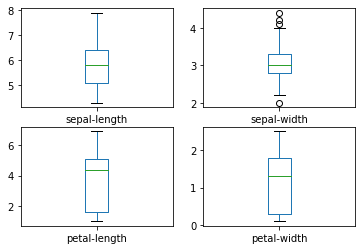

In [11]:
# boxplot using plot function in pandas

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

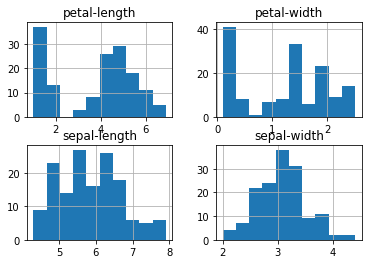

In [12]:
# histograms

dataset.hist()
pyplot.show()

### 2.2 Multivariate Plots

Multivariate plots are used to identify the interactions between the variables. Scatterplots of all pairs of attributes can be easily created using the scatter_matrix function.

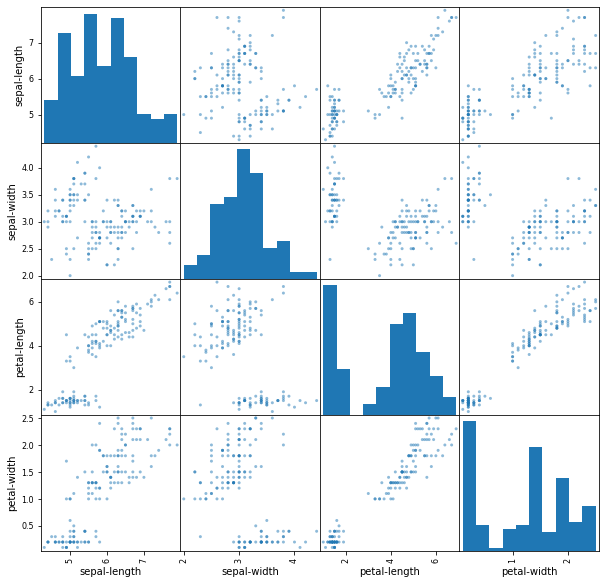

In [14]:
# scatter plot matrix

scatter_matrix(dataset, figsize=(10,10))
pyplot.show()

From the plot, some attributes are clearly highly correlated with each other: petal-width vs. petal-length, sepal-length vs. petal length.

### 2.3 Plot Attributes for each Class

Attribute for each class can be plotted and compared together to visualize the differences. It can be seen that the petal-length, petal-width, and sepal-width all have significant differences among the three Iris classes. On the other hand, the sepal-width variable does not see much of difference between classes. 

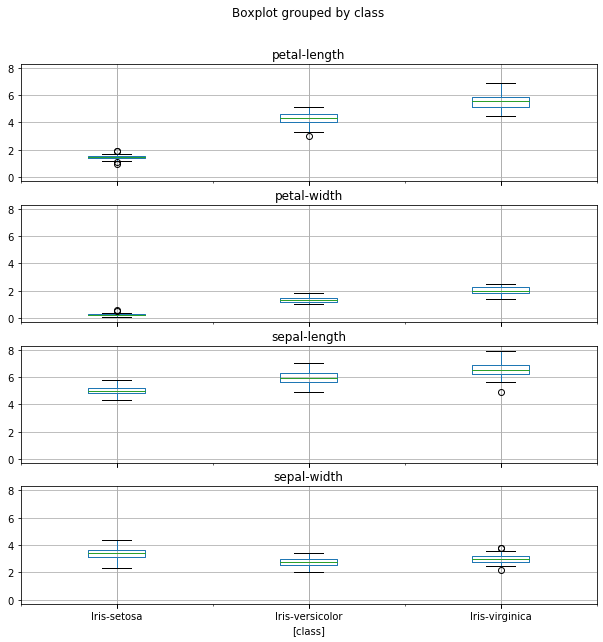

In [15]:
# boxplot of attributes for each class

dataset.boxplot(by='class',layout=(4,1),figsize=(10,10))
pyplot.show()

## 3. Constructing and evaluating the ML models

We create and evaluate some ML models in this section. The models we will be testing include:

- Logistic Regression
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbor (KNN)
- Decision Tree
- Navie Bayes
- Support Vector Machine (SVM)

In order to evaluate the performance of the ML models, the dataset has to be separated into training and testing datasets. The training data is used to train the model, while the testing data is used to evaluate the model performance on the unseen data. Additionally, when training the model, some of the parameters have to be selected. This requires the evaluation of the model accuracy based on the training data itself. In order to achieve, we also will use the 10-fold stratified cross validation to estimate the model accuracy. So the process of constructing and evaluating ML models are the following:

1. Separate training vs. testing data
2. Set-up the test harness to use 10-fold cross validation
3. Build various models to predict species from measurements
4. Selection of the best model

### 3.1 Separate training vs. testing data

When evaluating the model performance, we need to make sure that we are using the unseen data from model training, as the model itself would be tailored to best fit the data used to train the model. This would give us better estimate of the model accuracy. In order to achieve this, we will separate the testing data from the training data using the train_test_split function from the Scikit-Learn library. 20% of the data is used for testing, and the rest 80% is used for training the model.

In [24]:
# Split the training vs. testing data
dataset1 = dataset.values
X = dataset1[:, 0:4]
y = dataset1[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.2, random_state=1)

### 3.2  Test Harness

As we discussed above, the model will first be evaluated based on the cross-validation method. We here use the 10-fold stratified cross validation. This means that

- We will separate the training data to 10 partitions, using 9 as training and 1 as testing.
- The testing would iteratively use all 10 partitions.
- Stratified means that when splitting the 10 partitions, the distribution of the example by class is the same for all the 10 partitions.

The split of the partitions will be generated using random seed set via the random_state argument. This would make sure that all the models are using the same splits of the training dataset. And finally, we use accuracy metric to evaluate the models.

### 3.3 Build Models

In most of the Machine Learning problems, there is no way to know ahead of time which algorithm would give the best performance. Therefore we build various models and evaluate their performance based on the method discussed in 3.2. These algorithms include:

- Logistic Regression
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbor (KNN)
- Decision Tree
- Navie Bayes
- Support Vector Machine (SVM)

In [26]:
# spot check algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
# in this loop, we loop through all models using 10-fold stratified cross validation.
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=15, shuffle=True) # define the kfold CV method
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') #output the cv results, using accuracy as metric
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) # print the cv results for each model, using the avg of the 10 CV

LR: 0.950000 (0.040825)
LDA: 0.975000 (0.053359)
KNN: 0.958333 (0.041667)
CART: 0.925000 (0.108333)
NB: 0.950000 (0.076376)
SVM: 0.983333 (0.033333)


### 3.4 Select Best Model

From the above result, it seems the SVM model has the best performance, with accuracy score of over 98%. This is based on the average accuracy score of each model. A box plot can also be created to visualize the spread of the accuracy score for each CV split.

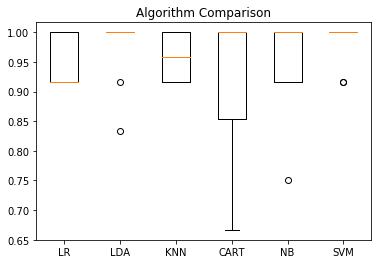

In [27]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

## 4 Make Predictions

Using the above result, SVM has the best performance. We can therefore use this to make predictions. This prediction is made to the validation set we hold out at the beginning. This would give us the accuracy of the model. If the prediction accuracy on the validation set is very different than what we got above from the training, then it might indicate some overfitting problem.

### 4.1 Make Predictions

The model has to be fitted using the complete training dataset. Then predictions are made toward the testing set.

In [30]:
# refit SVM model using entire training data.
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(predictions)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


### 4.2 Evaluate Predictions

After making predictions, we can evaluate the final model performance by comparing the predictions vs. the actual class designation. Accuracy scores, confusion matrices as well as the final classification reports are generated here. The model accuracy on the test data is about 97%, which is not very different from the training accuracy. This indicates that the model is not overfitted to the training set.

In [31]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### 4.3 Prediction with another method

We can also make and evaluate the predictions from another model. We here perform this check on the Logistic Regression model. We can see that the accuracy score for the LR model is only 83%. It is quite different than the training accuracy of 95%. It is also much lower than the SVM model performance above.

In [35]:
# refit LR model using the entire training data
modelLR = LogisticRegression(solver='liblinear', multi_class='ovr')
modelLR.fit(X_train, Y_train)
predictionsLR = modelLR.predict(X_validation)
print(predictionsLR)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [36]:
# Evaluate the LR predictions
print(accuracy_score(Y_validation, predictionsLR))
print(confusion_matrix(Y_validation, predictionsLR))
print(classification_report(Y_validation, predictionsLR))

0.8333333333333334
[[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.62      0.76        13
 Iris-virginica       0.55      1.00      0.71         6

       accuracy                           0.83        30
      macro avg       0.85      0.87      0.82        30
   weighted avg       0.91      0.83      0.84        30



## 5 Save and Load ML Models

Finally, we would like to save the above constructed ML model to a file. In the future, we can load the model back to make predictions for new/unseen observations. Two methods can be used: pickle and joblib.

### 5.1 Save and Load with pickle

Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions.

In [39]:
# Saving model using pickle
import pickle
filename = 'Iris_SVM_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_validation, Y_validation)
print(result)

0.9666666666666667


### 5.2 Save and Load with joblib

Joblib is part of the SciPy ecosystem and provides utilities for pipelining Python jobs. It provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently. This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (like K-Nearest Neighbors).

In [43]:
# save model using joblib
import joblib
filename = 'Iris_LR_model.sav'
joblib.dump(modelLR, filename)

#load model from disk
loaded_modelLR = joblib.load(filename)
resultLR = loaded_modelLR.score(X_validation, Y_validation)
print(resultLR)

0.8333333333333334
